# Chapter 2

## 2.3 Look at Titanic data

In [1]:
import warnings
warnings.filterwarnings('once')

import pandas as pd

c:\users\thein lin aung\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\thein lin aung\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\thein lin aung\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
print('train has {} rows and {} columns'.format(*train.shape))
print('test has {} rows and {} columns'.format(*test.shape))

train has 891 rows and 12 columns
test has 418 rows and 11 columns


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2.4 Data preparation and cleaning

In [8]:
# Deal with missing values

# option 1
# We only have two passengers without it. This is bearable
train = train.dropna(subset=["Embarked"])

# option 2
# We only have very few information about the cabin, let's drop it
train = train.drop("Cabin", axis=1)

# option 3
# The age misses quite a few times. But intuition
# says it might be important for someone's chance to survive.
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [9]:
# Identifiers

print('There are {} different (unique) PassengerIds in the data'.format(train["PassengerId"].nunique()))
print('There are {} different (unique) names in the data'.format(train["Name"].nunique()))
print('There are {} different (unique) ticket numbers in the data'.format(train["Ticket"].nunique()))

There are 889 different (unique) PassengerIds in the data
There are 889 different (unique) names in the data
There are 680 different (unique) ticket numbers in the data


In [10]:
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


### 2.4.3 Handling Text and Categorical Attributes

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### 2.4.4 Feature Scaling

In [12]:
print('The maximum age is {}'.format(train["Age"].max()))
print('The maximum fare is {}'.format(train["Fare"].max()))

The maximum age is 80.0
The maximum fare is 512.3292


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train) 
train = scaler.transform(train) # scaler returns a numpy array instead of pandas DataFrame

print('The minimum value is {} and the maximum value is {}'.format(train.min(), train.max()))

The minimum value is 0.0 and the maximum value is 1.0


In [14]:
train.shape

(889, 8)

### 2.4.5 Training and Testing

In [15]:
from sklearn.model_selection import train_test_split

input = train[:, 1:8]   # columns 1 to 7th
labels = train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(input, labels, test_size = 0.2)

print('We have {} training and {} testing rows'.format(train_input.shape[0], test_input.shape[0]))
print('There are {} input columns'.format(train_input.shape[1]))

We have 711 training and 178 testing rows
There are 7 input columns


In [16]:
import numpy as np

with open('data/train.npy', 'wb') as f:
    np.save(f, train_input)
    np.save(f, train_labels)

with open('data/test.npy', 'wb') as f:
    np.save(f, test_input)
    np.save(f, test_labels)

## 2.5 Baseline

In [17]:
import random
random.seed(a=None, version=2)

def classify(passenger):
    return random.randint(0, 1)

In [18]:
def run(f_classify, x):
    return list(map(f_classify, x))

In [19]:
result = run(classify, train_input)

In [20]:
def evaluate(predictions, actual):
    correct = list(filter(lambda item: item[0] == item[1], list(zip(predictions,actual))))
    return '{} correct predictions out of {}. Accuracy {:.0f} %' \
            .format(len(correct), len(actual), 100*len(correct)/len(actual))

print(evaluate(run(classify, train_input), train_labels))

340 correct predictions out of 711. Accuracy 48 %


In [21]:
# predict only death
def predict_death(item):
    return 0

print(evaluate(run(predict_death, train_input), train_labels))

434 correct predictions out of 711. Accuracy 61 %


### Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

predictions = run(predict_death, train_input)
confusion_matrix(train_labels, predictions)

array([[434,   0],
       [277,   0]], dtype=int64)

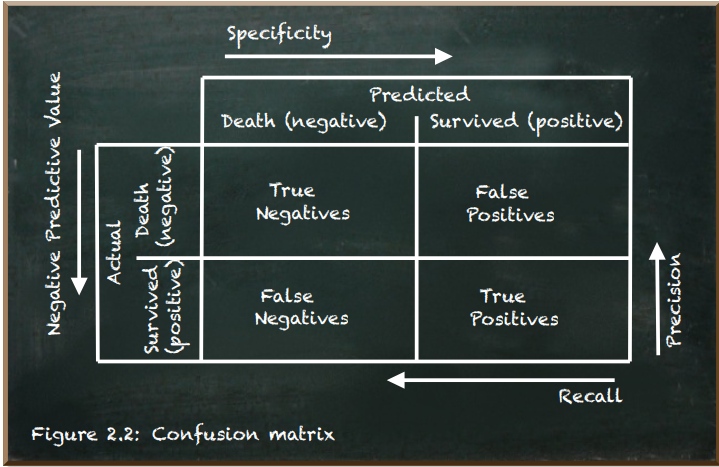

In [23]:
from IPython.display import Image
Image(filename='../images/confusion_matrix.png') 

### precision, recall, specificity, npv

In [24]:
from sklearn.metrics import precision_score, recall_score

print('The precision score of the predict_death classifier is {}'.format(precision_score(train_labels, predictions)))
print('The recall score of the predict_death classifier is {}'.format(recall_score(train_labels, predictions)))

def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(train_labels, predictions)

print('The specificity score of the predict_death classifier is {:.2f}'.format(specificity(cm)))
print('The npv score of the predict_death classifier is {:.2f}'.format(npv(cm)))

The precision score of the predict_death classifier is 0.0
The recall score of the predict_death classifier is 0.0
The specificity score of the predict_death classifier is 1.00
The npv score of the predict_death classifier is 0.61


c:\users\thein lin aung\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
random_predictions = run(classify, train_input)
random_cm = confusion_matrix(train_labels, random_predictions)

print('The precision score of the random classifier is {:.2f}'.format(precision_score(train_labels, random_predictions)))
print('The recall score of the random classifier is {:.2f}'.format(recall_score(train_labels, random_predictions)))
print('The specificity score of the random classifier is {:.2f}'.format(specificity(random_cm)))
print('The npv score of the random classifier is {:.2f}'.format(npv(random_cm)))

The precision score of the random classifier is 0.39
The recall score of the random classifier is 0.54
The specificity score of the random classifier is 0.46
The npv score of the random classifier is 0.61


In [26]:
def hypocrite(passenger, weight):
    return round(min(1,max(0,weight*0.5+random.uniform(0, 1))))

In [27]:
w_predictions = run(lambda passenger: hypocrite(passenger, -0.5),train_input)
w_cm = confusion_matrix(train_labels, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'.format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'.format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'.format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'.format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.35
The recall score of the hypocrite classifier is 0.21
The specificity score of the hypocrite classifier is 0.75
The npv score of the hypocrite classifier is 0.60


In [28]:
import numpy as np

# number of steps to consider between −1 and 1
cnt_steps = 40

# a list of the step numbers [0, 1, ..., 38, 39]
steps = np.arange(0, cnt_steps, 1).tolist()

# list of the weights at every step [−1, −0.95, ... 0.9, 0.95, 1.0]
weights = list(map(lambda weight: round(weight, 2),np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()))

# list of predictions at every step
l_predictions = list(map(lambda step: run(lambda passenger: hypocrite(passenger, weights[step]),train_input),steps))

# list of confusion matrices at every steo
l_cm = list(map(lambda step: confusion_matrix(train_labels, l_predictions[step]),steps))

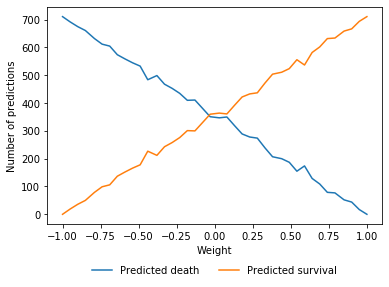

In [29]:
import matplotlib.pyplot as plt
import matplotlib

# create a graph for the number of predicted deaths
deaths, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
    label='Predicted death'
)

# create a graph for the number of predicted survivals
survivals, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
    label='Predicted survival'
)

plt.legend(handles=[deaths, survivals],loc='upper center', bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

In [30]:
l_precision = list(map(lambda step: precision_score(train_labels, l_predictions[step]),steps))
l_recall = list(map(lambda step: recall_score(train_labels, l_predictions[step]),steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]),steps))
l_npv = list(map(lambda step: npv(l_cm[step]),steps))

c:\users\thein lin aung\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


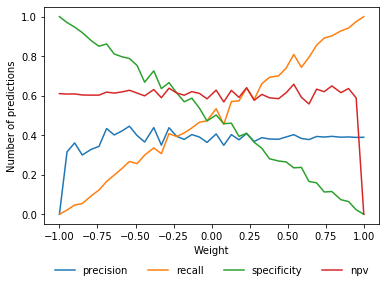

In [31]:
m_precision, = plt.plot(weights, l_precision, label="precision")
m_recall, = plt.plot(weights, l_recall, label="recall")
m_specificity, = plt.plot(weights, l_specificity, label="specificity")
m_npv, = plt.plot(weights, l_npv, label="npv")

plt.legend(handles=[m_precision, m_recall, m_specificity, m_npv],
            loc='upper center',
            bbox_to_anchor=(0.5, -0.15),
            framealpha=0.0,
            ncol=4)

plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

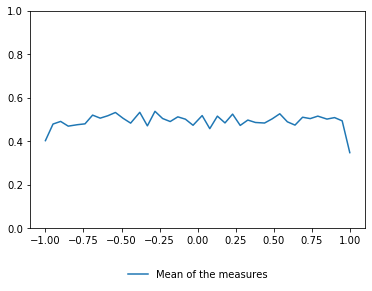

In [32]:
l_mean = list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall,l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, label="Mean of the measures")

plt.legend(handles=[m_mean],loc='upper center',bbox_to_anchor=(0.5, -0.15),framealpha=0.0)
plt.ylim(0, 1)
plt.show()

In [33]:
def classifier_report(name, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'.format(name,cr_precision))
    print('The recall score of the {} classifier is {:.2f}'.format(name,cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'.format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'.format(name,cr_npv))
    print('The information level is: {:.2f}'.format(cr_level))

In [34]:
classifier_report(
    "Random PQC",
    classify,
    train_input,
    train_labels
)

The precision score of the Random PQC classifier is 0.39
The recall score of the Random PQC classifier is 0.52
The specificity score of the Random PQC classifier is 0.47
The npv score of the Random PQC classifier is 0.61
The information level is: 0.50
